In [1]:
import pandas as pd
df = pd.read_csv("data/user_behavior_dataset.csv")

In [2]:
target = "Battery Drain (mAh/day)"

features = [
    "App Usage Time (min/day)",
    "Screen On Time (hours/day)",
    "Number of Apps Installed",
    "Data Usage (MB/day)",
    "Age"
]

df_model = df[features + [target]]
df_model.head()

,App Usage Time (min/day),Screen On Time (hours/day),Number of Apps Installed,Data Usage (MB/day),Age,Battery Drain (mAh/day)
0,393,6.4,67,1122,40,1872
1,268,4.7,42,944,47,1331
2,154,4.0,32,322,42,761
3,239,4.8,56,871,20,1676
4,187,4.3,58,988,31,1367


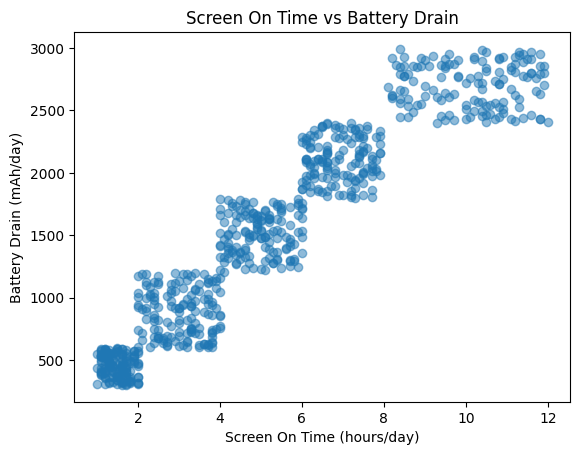

In [3]:
import matplotlib.pyplot as plt

plt.scatter(
    df_model["Screen On Time (hours/day)"],
    df_model[target],
    alpha=0.5
)
plt.xlabel("Screen On Time (hours/day)")
plt.ylabel("Battery Drain (mAh/day)")
plt.title("Screen On Time vs Battery Drain")
plt.show()

In [4]:
X = df_model.drop(columns=["Battery Drain (mAh/day)"])
y = df_model["Battery Drain (mAh/day)"]

X.head(), y.head()

(   App Usage Time (min/day)  Screen On Time (hours/day)  \
 0                       393                         6.4   
 1                       268                         4.7   
 2                       154                         4.0   
 3                       239                         4.8   
 4                       187                         4.3   
 
    Number of Apps Installed  Data Usage (MB/day)  Age  
 0                        67                 1122   40  
 1                        42                  944   47  
 2                        32                  322   42  
 3                        56                  871   20  
 4                        58                  988   31  ,
 0    1872
 1    1331
 2     761
 3    1676
 4    1367
 Name: Battery Drain (mAh/day), dtype: int64)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((560, 5), (140, 5))

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 157.66478181475873
RMSE: 187.81707452975954


In [9]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
1,Screen On Time (hours/day),55.217898
2,Number of Apps Installed,12.786506
0,App Usage Time (min/day),1.392498
3,Data Usage (MB/day),0.071993
4,Age,-0.807530


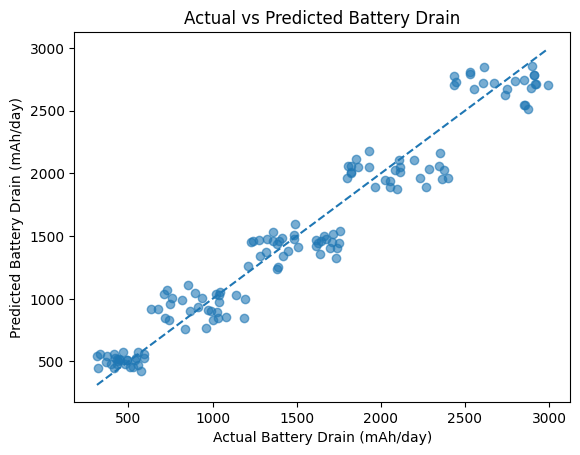

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Battery Drain (mAh/day)")
plt.ylabel("Predicted Battery Drain (mAh/day)")
plt.title("Actual vs Predicted Battery Drain")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.show()


In [12]:
X_plus = X.copy()
X_plus ["User Behavior Class"] = df["User Behavior Class"]

In [13]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_plus, y,
    test_size=0.2,
    random_state=42
)

In [14]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae2 = mean_absolute_error(y_test2, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))

print("Old MAE:", mae)
print("New MAE:", mae2)

print("Old RMSE:", rmse)
print("New RMSE:", rmse2)

Old MAE: 157.66478181475873
New MAE: 140.6578569518359
Old RMSE: 187.81707452975954
New RMSE: 167.1178562222103


In [16]:
import pandas as pd

coef2 = pd.DataFrame({
    "Feature": X_plus.columns,
    "Coefficient": model2.coef_
}).sort_values(by="Coefficient", ascending=False)

coef2

,Feature,Coefficient
5,User Behavior Class,470.800471
1,Screen On Time (hours/day),9.853777
2,Number of Apps Installed,0.504391
0,App Usage Time (min/day),0.470516
3,Data Usage (MB/day),0.030035
4,Age,-0.206049


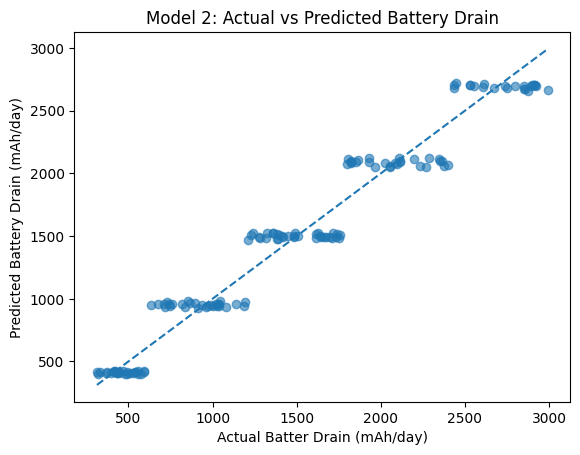

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test2, y_pred2, alpha=0.6)
plt.xlabel("Actual Batter Drain (mAh/day)")
plt.ylabel("Predicted Battery Drain (mAh/day)")
plt.title("Model 2: Actual vs Predicted Battery Drain")

plt.plot(
    [y_test2.min(), y_test2.max()],
    [y_test2.min(), y_test2.max()],
    linestyle="--"
)

plt.show()

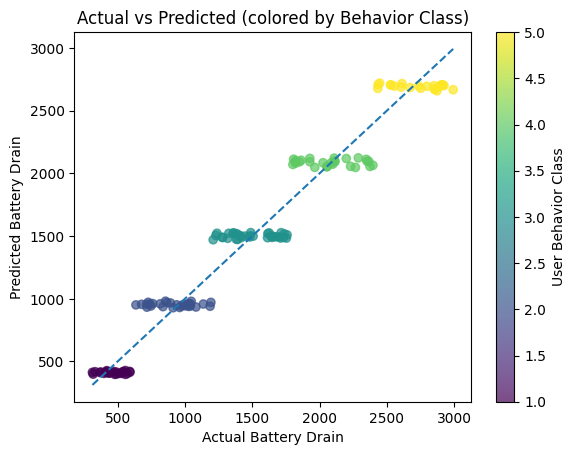

In [21]:
import matplotlib.pyplot as plt

plt.scatter(
    y_test2,
    y_pred2,
    c=X_test2["User Behavior Class"],
    cmap="viridis",
    alpha=0.7
)

plt.plot(
    [y_test2.min(), y_test2.max()],
    [y_test2.min(), y_test2.max()],
    linestyle="--"
)

plt.xlabel("Actual Battery Drain")
plt.ylabel("Predicted Battery Drain")
plt.title("Actual vs Predicted (colored by Behavior Class)")
plt.colorbar(label="User Behavior Class")
plt.show()

Even though the model captures the mian relationship between usage patterns and battery drain, residual clustering suggests the presence of addition unmodeled factors such as device hardware and operating system. These variables were excluded to maintain interpretability and avoid overfitting, but their effects are visible from previous graphs.

In [23]:
X_plus.columns

Index(['App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age',
       'User Behavior Class'],
      dtype='object')

In [28]:
df_type = df.groupby("Device Model").count()
print(df_type["Age"])

Device Model
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Xiaomi Mi 11          146
iPhone 12             146
Name: Age, dtype: int64


In [30]:
X_os = X_plus.copy()

X_os["Operating System"] = df["Operating System"]

X_os_encoded = pd.get_dummies(
    X_os,
    columns=["Operating System"],
    drop_first=True
)

In [32]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X_os_encoded, y,
    test_size=0.2,
    random_state=42
)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test3)

In [33]:
mae3 = mean_absolute_error(y_test3, y_pred3)
rmse3 = np.sqrt(mean_squared_error(y_test3, y_pred3))

print("Model 2 MAE:", mae2)
print("Model 3 MAE:", mae3)

print("Model 2 RMSE:", rmse2)
print("Model 3 RMSE:", rmse3)

Model 2 MAE: 140.6578569518359
Model 3 MAE: 140.60183819159278
Model 2 RMSE: 167.1178562222103
Model 3 RMSE: 167.25352602354343


In [34]:
pd.DataFrame({
    "Feature": X_os_encoded.columns,
    "Coefficient": model3.coef_
}).sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
5,User Behavior Class,470.380043
1,Screen On Time (hours/day),10.035928
6,Operating System_iOS,7.705040
2,Number of Apps Installed,0.494980
0,App Usage Time (min/day),0.470783
3,Data Usage (MB/day),0.030145
4,Age,-0.208329


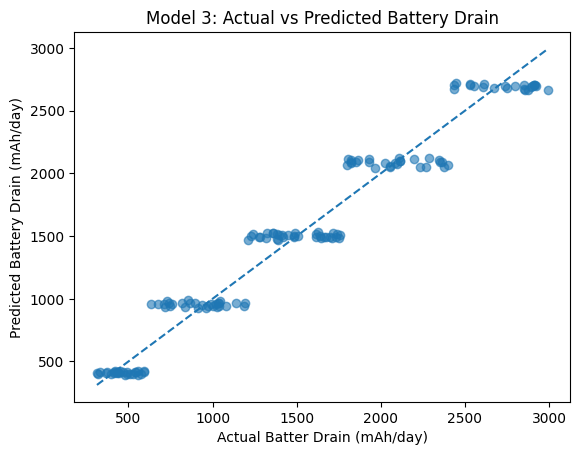

In [35]:
plt.scatter(y_test3, y_pred3, alpha=0.6)
plt.xlabel("Actual Batter Drain (mAh/day)")
plt.ylabel("Predicted Battery Drain (mAh/day)")
plt.title("Model 3: Actual vs Predicted Battery Drain")

plt.plot(
    [y_test3.min(), y_test3.max()],
    [y_test3.min(), y_test3.max()],
    linestyle="--"
)

plt.show()